In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('tsla.us.txt')

In [3]:
data_set = data.iloc[: ,1:2 ].values
data_set

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [305.5 ],
       [302.5 ],
       [302.5 ]])

In [4]:
def data_to_Xy(data, timp_step= 10):
    x_set = []
    y_set = []

    for i in range(timp_step, len(data)):
        x_set.append(data[i-timp_step:i, 0])
        y_set.append(data[i, 0])

    x_set, y_set = np.array(x_set), np.array(y_set)
    return x_set, y_set

In [5]:
X, y = data_to_Xy(data_set)
print(len(X) , len(y))

1848 1848


In [6]:
X_train = X[:int(len(X)*0.8)] # 80 % train 80row
y_train = y[:int(len(y)*0.8)] #80 row

X_test = X[int(len(X)*0.8):] # 20% #81 ->100
y_test = y[int(len(y)*0.8):]

In [7]:
# Reshaping (n of  samples , time_step , dim)
X_train = np.reshape(X_train , (X_train.shape[0] ,X_train.shape[1]  , 1))
X_test = np.reshape(X_test , (X_test.shape[0] ,X_test.shape[1]  , 1))

In [10]:
lstm_model = Sequential()
lstm_model.add(LSTM(50 ,activation='tanh' , return_sequences=True   ,input_shape=(X_train.shape[1] , 1)))
lstm_model.add(LSTM(30 ,activation='tanh' , return_sequences=True ))
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(20 ,activation='tanh' , return_sequences=True ))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(1 ))

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# compiling
lstm_model.compile(optimizer='adam' , loss='mse')

In [20]:
# Model Training
history = lstm_model.fit(X_train , y_train  , epochs=10 , validation_split=0.2)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 11901.1270 - val_loss: 41775.6445
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 11837.1094 - val_loss: 41560.5977
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11761.1729 - val_loss: 41343.7305
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11698.7305 - val_loss: 41131.9062
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11621.9668 - val_loss: 40914.2266
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11550.3135 - val_loss: 40699.9062
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11483.1240 - val_loss: 40486.0430
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11406.1572 - val_loss: 40270.5312
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11338.3555 - val_loss: 40054.5273
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11270.8799 - val_loss: 39833.4141


In [21]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

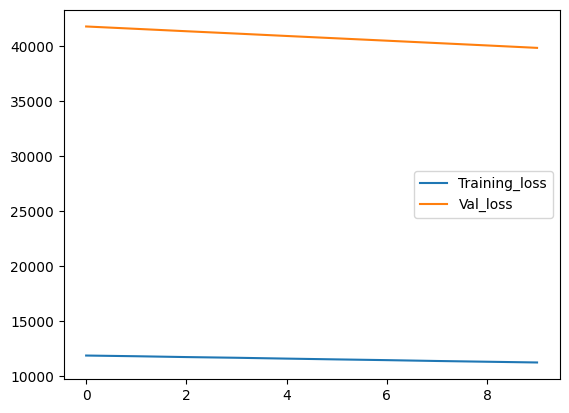

In [22]:
# Plot Loss vs Val_loss

plt.plot(history.history['loss'] , label = "Training_loss")
plt.plot(history.history['val_loss'] , label = "Val_loss")
plt.legend()
plt.show()